# Analiza rabljenih bark
V tem dokumentu je analiza podatkov rabljenih bark pridobljenih iz [Boat24](https://www.boat24.com/en/), narejena je s pomočjo knjižnice *pandas* ter *matplotlib*. Analizirane so barke na motor, torej ni jadrnic.

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

barke = pd.read_csv("podatki_bark.csv", index_col="id")
pd.options.display.max_rows = 20

barke

,ime_barke,tip_barke,cena,dolzina,sirina,letnik,st_kabin,st_ur,drzava
id,,,,,,,,,
1,AZIMUT 46 FLY,Flybridge,NaN,15,4,2003,3,930,Italy
10,Riviera Marine 51 Flybridge,Flybridge,440000,17,5,2004,3,1000,NaN
100,Pershing 72,Motor Yacht,NaN,22,6,2007,NaN,645,Italy
1000,Manò Marine 3850,Cabin Cruiser,135000,12,4,2008,3,690,Italy
1001,Crownline 315 sr,Offshore Boat,72000,10,3,2007,2,650,Italy
...,...,...,...,...,...,...,...,...,...
994,Four Winns Vista 288,Sport Boat,45000,8,3,2008,2,400,Italy
995,Ilver Galaxi 28,Sport Boat,35000,9,3,1995,1,645,Italy
996,FIM REGINA 340 - FUORIBORDO YAMAHA #16,Motor Yacht,340000,10,3,2023,1,NaN,Italy


Za začetek je tukaj tabela vseh podatkov, ki sem jih zajel v analizi, posamično plovilo predstavlja ena vrstica tabele.

In [22]:
barke.sort_values("cena", ascending=False).head(1)

,ime_barke,tip_barke,cena,dolzina,sirina,letnik,st_kabin,st_ur,drzava
id,,,,,,,,,
631,Mondo marine ALEXANDER AGAIN,Superyacht,17500000.0,49.15,9.0,NaN,6.0,3924.0,Italy


In [21]:
barke.sort_values("cena").head(1)

,ime_barke,tip_barke,cena,dolzina,sirina,letnik,st_kabin,st_ur,drzava
id,,,,,,,,,
1133,Eolo Powercraft Eolo - Tobago,Sport Boat,4500.0,5.3,2.15,1994.0,NaN,NaN,Italy


Tukaj sta kot zanimivost najdražja in najcenejša barka.

<Axes: title={'center': 'Povprečna cena po tipih bark'}, xlabel='Tip barke'>

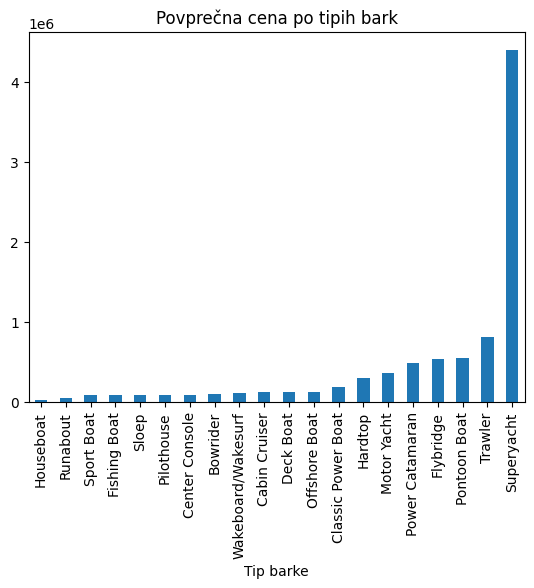

In [32]:
barke.groupby("tip_barke").mean(numeric_only=True).sort_values("cena").cena.plot.bar(title="Povprečna cena po tipih bark", xlabel="Tip barke")

Če gledamo le povprečne cene brez upoštevanja drugih faktorjeu, je očitno da bodo najdražje barke t.i. "Superyacht", ker so daleč največje. Spodaj je enak graf, le brez te kategorije.

<Axes: title={'center': 'Povprečna cena po tipih bark, brez superyacht'}, xlabel='Tip barke'>

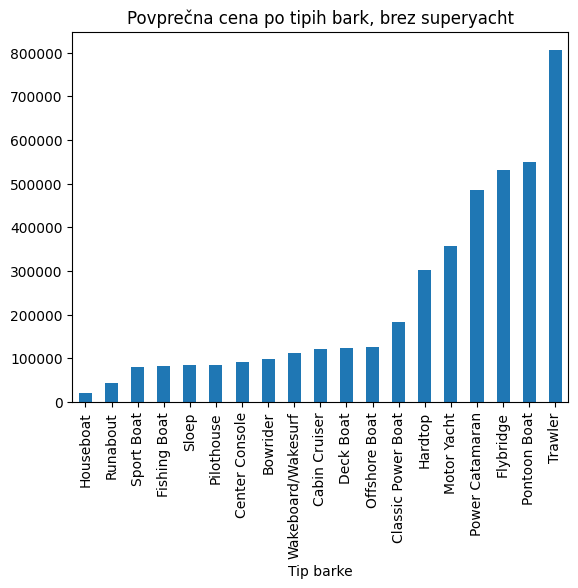

In [33]:
brez_superyacht = barke[barke.tip_barke != "Superyacht"]
brez_superyacht.groupby("tip_barke").mean(numeric_only=True).sort_values("cena").cena.plot.bar(title="Povprečna cena po tipih bark, brez superyacht", xlabel="Tip barke")

C:\Users\naber\AppData\Local\Temp\ipykernel_14364\2823203178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brez_na.dolzina = brez_na.dolzina.astype(int)


Text(0.5, 1.0, 'Povprečne cene bark po dolžinah')

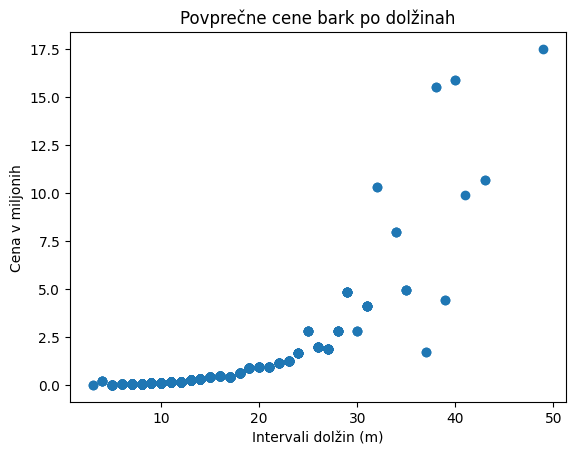

In [198]:
brez_na = barke.dropna(subset=["dolzina"])
brez_na.dolzina = brez_na.dolzina.astype(int)
intervali_dolzin = list(range(brez_na.dolzina.min(), brez_na.dolzina.max() + 2, 1))
brez_na_intervali = pd.cut(brez_na.dolzina, bins=intervali_dolzin, right=False)
brez_na_povprecje = brez_na.groupby(brez_na_intervali).cena.mean(numeric_only=True)
zdruzeno = brez_na.join(brez_na_povprecje, on=brez_na_intervali, rsuffix="_povprecje")

dolzine = zdruzeno.dolzina
cene = zdruzeno.groupby("dolzina").cena_povprecje.transform("first") / 10**6

plt.scatter(dolzine, cene)
plt.xlabel("Intervali dolžin (m)")
plt.ylabel("Cena v miljonih")
plt.title("Povprečne cene bark po dolžinah")

C:\Users\naber\AppData\Local\Temp\ipykernel_14364\2068597002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brez_na.dolzina = brez_na.dolzina.astype(int)


Text(0.5, 1.0, 'Povprečne cene bark po dolžinah do 25m')

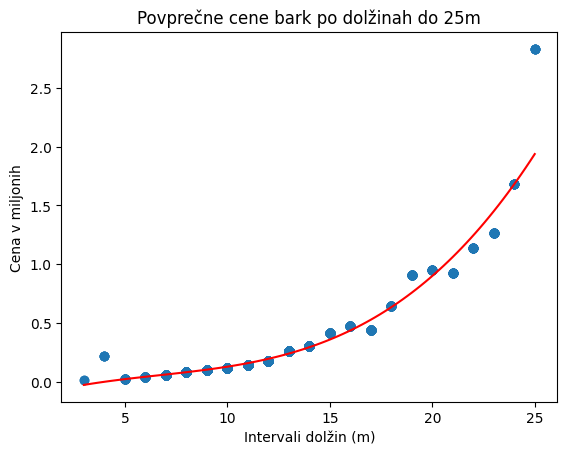

In [250]:
brez_na = barke.dropna(subset=["dolzina"])
brez_na.dolzina = brez_na.dolzina.astype(int)
brez_na = brez_na[brez_na.dolzina <= 25]
intervali_dolzin = list(range(brez_na.dolzina.min(), brez_na.dolzina.max() + 2, 1))
brez_na_intervali = pd.cut(brez_na.dolzina, bins=intervali_dolzin, right=False)
brez_na_povprecje = brez_na.groupby(brez_na_intervali).cena.mean(numeric_only=True)
zdruzeno = brez_na.join(brez_na_povprecje, on=brez_na_intervali, rsuffix="_povprecje")

dolzine = zdruzeno.dolzina
cene = zdruzeno.groupby("dolzina").cena_povprecje.transform("first") / 10**6

stopnja = 3
koeficienti = np.polyfit(dolzine, cene, stopnja)
polinom = np.poly1d(koeficienti)
x = np.linspace(dolzine.min(), dolzine.max(), 100)
y = polinom(x)

plt.scatter(dolzine, cene)
plt.plot(x, y, color="red")
plt.xlabel("Intervali dolžin (m)")
plt.ylabel("Cena v miljonih")
plt.title("Povprečne cene bark po dolžinah do 25m")

Zgornja dva grafa nam prikazujeta, kako se spreminjajo povprečne cene bark z vsakim metrom dolžine v miljonih evrov. V drugem grafu sem dolžino omejil na 25m, ker je za daljše barke premalo podatkov za posamezno dolžino, da bi dobili neko merodajno sliko. Dodal sem še krivuljo, ki s polinomsko regresijo oceni podatke, da si morda lažje predstavljamo, kako cena raste.

In [206]:
brez_na = barke.dropna(subset=["dolzina"]).copy()
brez_na.dolzina = brez_na.dolzina.astype(int)
brez_na = brez_na[brez_na.dolzina <= 25]
intervali_dolzin = list(range(brez_na.dolzina.min(), brez_na.dolzina.max() + 2, 1))
brez_na_intervali = pd.cut(brez_na.dolzina, bins=intervali_dolzin, right=False)
brez_na_povprecje = brez_na.groupby(brez_na_intervali).mean(numeric_only=True)
zdruzeno2 = brez_na.join(brez_na_povprecje, on=brez_na_intervali, rsuffix="_povprecje")

dolzine = zdruzeno.dolzina
cene = zdruzeno.groupby("dolzina").cena_povprecje.transform("first") / 10**6

pd.options.display.max_rows = None
pd.options.display.float_format = '{:.0f}'.format 
brez_na_povprecje.cena

dolzina
[3, 4)       12000
[4, 5)      220785
[5, 6)       21266
[6, 7)       43847
[7, 8)       62898
[8, 9)       81915
[9, 10)     103459
[10, 11)    118870
[11, 12)    139682
[12, 13)    179968
[13, 14)    262388
[14, 15)    300985
[15, 16)    419543
[16, 17)    472962
[17, 18)    440877
[18, 19)    645537
[19, 20)    911162
[20, 21)    954270
[21, 22)    922611
[22, 23)   1136435
[23, 24)   1265952
[24, 25)   1685000
[25, 26)   2830250
Name: cena, dtype: float64

Pa še konkretne številke za povprečja po intervalih dolžin. 

In [280]:
pd.options.display.max_rows = None
pd.options.display.float_format = None

barke.dropna(subset=["dolzina"])
barke.dropna(subset=["letnik"])
barke_do25 = barke[barke.dolzina < 25]
barke_do25["zdruzena_starost"] = 10 * (barke_do25.letnik // 10)
barke_do25["zdruzene_dolzine"] = 5 * (barke_do25.dolzina // 5) + 5
dolzina_starost = barke_do25.iloc[:, [2, 9, 10]]
dolzina_starost.dropna(subset=["cena"])
zdruzeno_dolzina_starost = dolzina_starost.groupby(["zdruzene_dolzine", "zdruzena_starost"]).cena.mean()

zdruzeno_dolzina_starost

C:\Users\naber\AppData\Local\Temp\ipykernel_14364\3055437056.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barke_do25["zdruzena_starost"] = 10 * (barke_do25.letnik // 10)
C:\Users\naber\AppData\Local\Temp\ipykernel_14364\3055437056.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barke_do25["zdruzene_dolzine"] = 5 * (barke_do25.dolzina // 5) + 5


zdruzene_dolzine  zdruzena_starost
5.0               1950.0              6.000000e+03
                  1990.0              1.600000e+04
                  2020.0              2.211846e+05
10.0              1950.0              7.466667e+04
                  1960.0              1.802667e+05
                  1970.0              5.233333e+04
                  1980.0              6.117595e+04
                  1990.0              4.485119e+04
                  2000.0              6.790038e+04
                  2010.0              1.117229e+05
                  2020.0              1.035956e+05
15.0              1960.0                       NaN
                  1970.0              5.700000e+04
                  1980.0              8.569123e+04
                  1990.0              1.005752e+05
                  2000.0              1.616118e+05
                  2010.0              3.577890e+05
                  2020.0              5.673120e+05
20.0              1960.0              5.865000e

Zgornji graf nam prikazuje, kako se spreminja povprečna cena bark v intervalih po 10 let. Pričakovano so novejše barke najdražje, ostali retultati (pred letom 2000) pa so kar presenetljivi. Cene namreč ne padajo s starostjo bark, ampak vmes poskočijo, to je predvsem opazno med leti 1960-1970. Razloga za to ne poznam, ker nisem dovolj velik poznavalec bark, kot kaže so barke iz tistega obdobja še posebej cenjene.

In [ ]:
brez_Na2 = barke.dropna(subset=["st_ur"]).copy()
brez_Na2.st_ur = brez_Na2.st_ur.astype(int)
brez_Na2 = brez_Na2[brez_Na2.st_ur <= 3500]
intervali_ur = list(range(brez_Na2.st_ur.min(), brez_Na2.st_ur.max() + 2, 100))
brez_Na2_intervali = pd.cut(brez_Na2.st_ur, bins=intervali_ur, right=False)
brez_Na2_povprecje = brez_Na2.groupby(brez_Na2_intervali).cena.mean(numeric_only=True)
zdruzeno3 = brez_Na2.join(brez_Na2_povprecje, on=brez_Na2_intervali, rsuffix="_povprecje")

ure = zdruzeno3.st_ur
cene3 = zdruzeno3.groupby("st_ur").cena_povprecje.transform("first") / 10**6

plt.figure(figsize=(8, 6))
plt.scatter(ure, cene3)
plt.xlabel("Intervali starosti (po 10 let)")
plt.ylabel("Cena v miljonih")
plt.title("Povprečne cene bark starostih")